In [2]:
#Binary-Classification Problem
#instantiating a small convnet for dogs vs cats classification

from keras import layers, models
model=models.Sequential()
model.add(layers.InputLayer(input_shape=(150, 150, 3)))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [3]:
#compilation
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [4]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_dir=r"C:\Users\skuma\OneDrive\Desktop\ML\DogsVsCat_data\train"
val_dir=r"C:\Users\skuma\OneDrive\Desktop\ML\DogsVsCat_data\val"
test_dir=r"C:\Users\skuma\OneDrive\Desktop\ML\DogsVsCat_data\test"

train_generator=train_datagen.flow_from_directory(
    train_dir,#target directory
    target_size=(150,150), #resize all images to 150x150
    batch_size=20,
    class_mode='binary'
)

val_generator=test_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150), #resize all images to 150x150
    batch_size=20,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
# The generator does not stop after one epoch
# Once it reaches the last image, it starts again from the first image
for data_batch,labels_batch in train_generator:
    print('data batch shape:',data_batch.shape)
    print('labels batch shape:',labels_batch.shape)
    break
print(len(train_generator))
print(train_generator[0][1])

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
100
[1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1.]


In [6]:
#fitting the model
import tensorflow as tf
hstory=None
with tf.device('/GPU:0'):
    history=model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=val_generator,
        validation_steps=50
    )
#save the model
model.save('cats_and_dogs_small_1.h5')

C:\Users\skuma\AppData\Local\Temp\ipykernel_3748\2752914565.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(


Epoch 1/30
100/100 [==============================] - 194s 89ms/step - loss: 0.6880 - acc: 0.5395 - val_loss: 0.6662 - val_acc: 0.6280
Epoch 2/30
100/100 [==============================] - 7s 67ms/step - loss: 0.6474 - acc: 0.6165 - val_loss: 0.6335 - val_acc: 0.6120
Epoch 3/30
100/100 [==============================] - 6s 61ms/step - loss: 0.5993 - acc: 0.6890 - val_loss: 0.6090 - val_acc: 0.6620
Epoch 4/30
100/100 [==============================] - 7s 67ms/step - loss: 0.5643 - acc: 0.7050 - val_loss: 0.5939 - val_acc: 0.6830
Epoch 5/30
100/100 [==============================] - 6s 64ms/step - loss: 0.5356 - acc: 0.7240 - val_loss: 0.6022 - val_acc: 0.6590
Epoch 6/30
100/100 [==============================] - 6s 61ms/step - loss: 0.5094 - acc: 0.7400 - val_loss: 0.5819 - val_acc: 0.6810
Epoch 7/30
100/100 [==============================] - 6s 61ms/step - loss: 0.4898 - acc: 0.7620 - val_loss: 0.5870 - val_acc: 0.6900
Epoch 8/30
100/100 [==============================] - 6s 61ms/step 

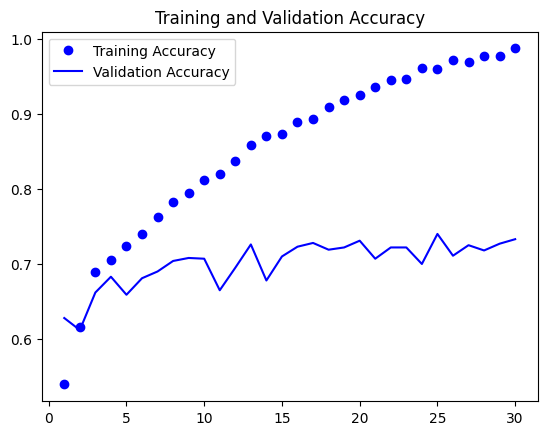

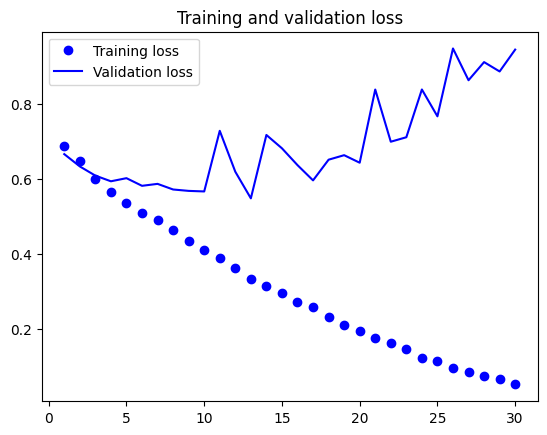

In [7]:
#plotting curves of loss and accuracy
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [8]:
#setting up a data augmentation configuration via ImageDataGenerator
datagen=ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

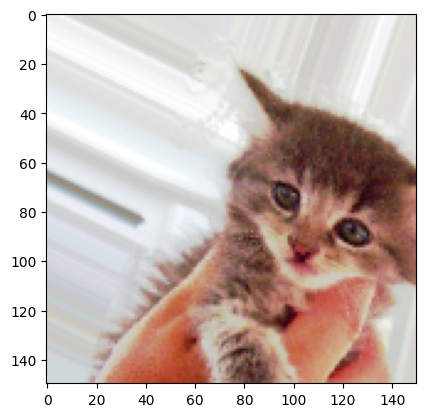

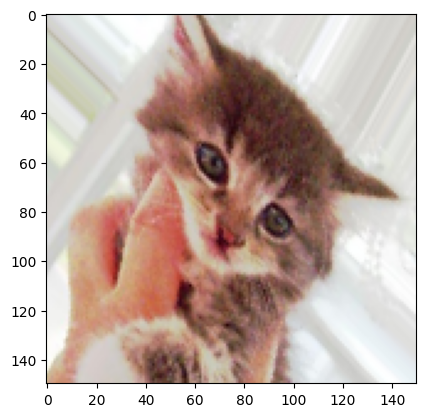

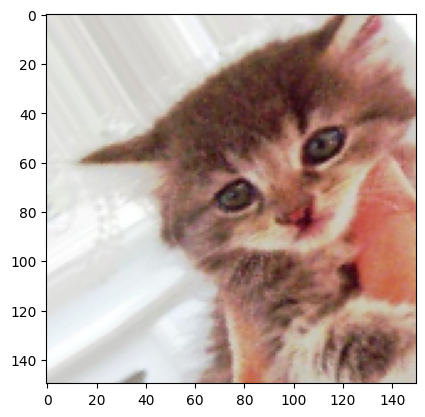

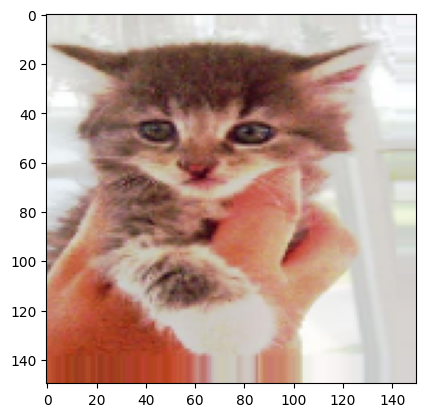

In [10]:
#Augmentation techniques
import os
from tensorflow.keras.utils import load_img,img_to_array,array_to_img
train_cats_dir=r"C:\Users\skuma\OneDrive\Desktop\ML\DogsVsCat_data\train\cats"
fnames=[os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]
img_path=fnames[3]
img=load_img(img_path,target_size=(150,150))#read the image and resize it
x=img_to_array(img)#Converts it to a Numpy array with shape (150, 150, 3)
x=x.reshape((1,)+x.shape)#reshape it to (1,150,150,3)
i=0
#Generates batches of randomly transformed images. Loops indefinitely, so you need to break the loop at some point!
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot=plt.imshow(array_to_img(batch[0]))
    i+=1
    if(i%4==0):
        break
plt.show()

In [12]:
#defining a new convnet that includes dropout
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])
print(model2.summary())
model2.compile(loss='binary_crossentropy',
               optimizer=optimizers.RMSprop(learning_rate=1e-4),
               metrics=['acc'])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

C:\Users\skuma\anaconda3\envs\tf-gpu\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [14]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen=ImageDataGenerator(rescale=1./255)
#Validation data should not be augmented

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'#Because you use binary_crossentropy loss, you need binary labels.
)
validation_generator=test_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

history2=model2.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

model2.save('cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


C:\Users\skuma\AppData\Local\Temp\ipykernel_3748\11551658.py:27: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2=model2.fit_generator(


Epoch 1/100
100/100 [==============================] - 19s 189ms/step - loss: 0.6928 - acc: 0.5100 - val_loss: 0.6789 - val_acc: 0.6120
Epoch 2/100
100/100 [==============================] - 19s 185ms/step - loss: 0.6823 - acc: 0.5665 - val_loss: 0.6607 - val_acc: 0.5910
Epoch 3/100
100/100 [==============================] - 17s 166ms/step - loss: 0.6649 - acc: 0.6035 - val_loss: 0.8246 - val_acc: 0.5020
Epoch 4/100
100/100 [==============================] - 18s 175ms/step - loss: 0.6670 - acc: 0.5905 - val_loss: 0.6566 - val_acc: 0.5900
Epoch 5/100
100/100 [==============================] - 17s 166ms/step - loss: 0.6492 - acc: 0.6190 - val_loss: 0.6368 - val_acc: 0.6340
Epoch 6/100
100/100 [==============================] - 18s 183ms/step - loss: 0.6450 - acc: 0.6310 - val_loss: 0.6961 - val_acc: 0.5600
Epoch 7/100
100/100 [==============================] - 18s 177ms/step - loss: 0.6311 - acc: 0.6415 - val_loss: 0.5983 - val_acc: 0.6820
Epoch 8/100
100/100 [===========================

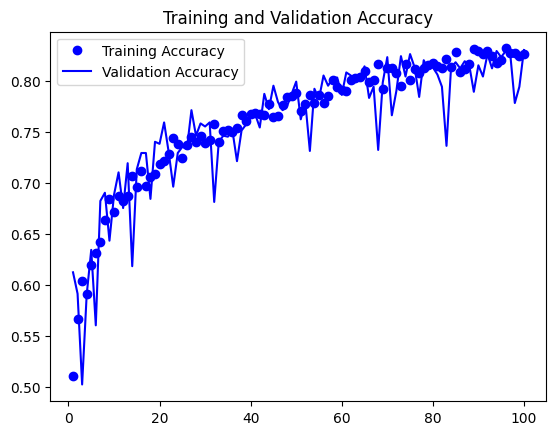

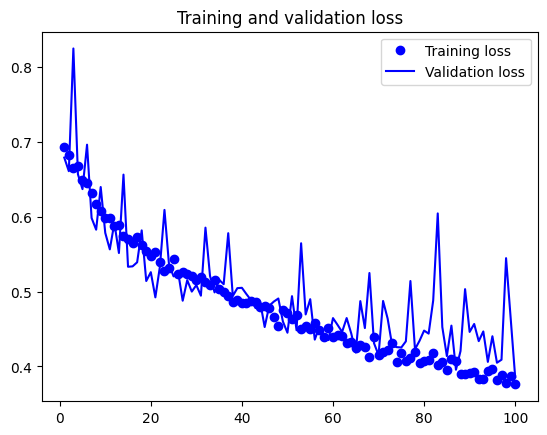

In [15]:
#plotting curves of loss and accuracy
plt.clf()
acc=history2.history['acc']
val_acc=history2.history['val_acc']
loss=history2.history['loss']
val_loss=history2.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [32]:
import numpy as np
img_file=r"C:\Users\skuma\OneDrive\Desktop\ML\DogsVsCat_data\test\cats\1582.jpg"
img=load_img(img_file,target_size=(150,150))
img_array=img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255.0
prediction=model2.predict(img_array)
print(prediction)
if(prediction<=0.5):
    print("Cat")
else:
    print("Dog")


1/1 [==============================] - 0s 28ms/step
[[0.19165987]]
Cat
